In [18]:
from monai.utils import first, set_determinism
import monai
import monai.data

from monai.data import (
    DataLoader,
    Dataset,
    CacheDataset,
    load_decathlon_datalist,
    decollate_batch,
)

from monai.transforms import (
    ToTensord,
    SqueezeDimd,
    AsDiscrete,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandFlipd,
    RandCropByPosNegLabeld,
    RandShiftIntensityd,
    ScaleIntensityRanged,
    Spacingd,
    RandRotate90d,
)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Data loading

## Read ISLES

### Test on one sample

image shape: torch.Size([2, 112, 112, 72])
label shape: torch.Size([1, 112, 112, 72])


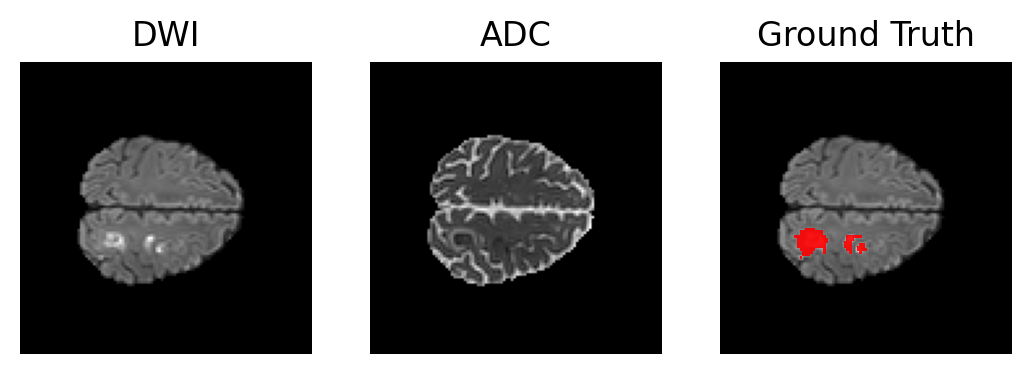

In [17]:
# Inspired from : https://github.com/pashtari/factorizer-isles22/blob/master/get_started.ipynb
# set data path
dataset_dir = "../data/isles"

# set patient ID and images path
id_ = "sub-strokecase0050"
dwi_path = f"{dataset_dir}/{id_}/ses-0001/dwi/{id_}_ses-0001_dwi.nii.gz"
adc_path = f"{dataset_dir}/{id_}/ses-0001/dwi/{id_}_ses-0001_adc.nii.gz"
msk_path = f"{dataset_dir}/derivatives/{id_}/ses-0001/{id_}_ses-0001_msk.nii.gz"

# make data dictionary
data = {
    "image": [dwi_path, adc_path],
    "label": msk_path,
}

load_image = LoadImaged(
    ["image", "label"],
    ensure_channel_first=True,
    allow_missing_keys=True,
)

# load image data
dicto = load_image(data)
print(f"image shape: {dicto['image'].shape}")
print(f"label shape: {dicto['label'].shape}")

dwi_image = dicto["image"][0]
adc_image = dicto["image"][1]
msk_image = dicto["label"][0]

# pick a slice with the largest lesion volume for visualization
slc = msk_image.sum((0, 1)).argmax()

fig, ax = plt.subplots(1, 3, dpi=200)
# visulize DWI image
ax[0].imshow(dwi_image[:, :, slc], cmap="gray", origin="lower")
ax[0].set_title("DWI")
ax[0].set_axis_off()

# visulize ADC image
ax[1].imshow(adc_image[:, :, slc], cmap="gray", origin="lower")
ax[1].set_title("ADC")
ax[1].set_axis_off()

# visulize label
ax[2].imshow(dwi_image[:, :, slc], "gray", origin="lower")
masked = np.ma.array(dwi_image[:, :, slc], mask=(msk_image[:, :, slc] == 0))
ax[2].imshow(masked, cmap=ListedColormap(["red"]), alpha=0.9, origin="lower")
ax[2].set_title("Ground Truth")
ax[2].set_axis_off()

### Load the entire dataset

In [ ]:
train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"],ensure_channel_first=True, allow_missing_keys=True,),
        ToTensord(["image", "label"])
    ]
)

In [26]:
data_dir = "../data/isles/"
json_file = "dataset_without_flair.json"

datasets = data_dir + json_file
datalist = load_decathlon_datalist(datasets, True, "training")

train_ds = CacheDataset(
    data=datalist,
    transform = train_transforms,
    cache_num=24,
    cache_rate=1.0,
    num_workers=8,
)

train_loader = DataLoader(train_ds, batch_size=1, shuffle=True, pin_memory=True)
check_data = first(train_loader)
images, label = (check_data["image"][0], check_data["label"][0][0])
print(images.shape)
print(label.shape)

Loading dataset: 100%|██████████| 24/24 [00:00<00:00, 27.84it/s]
c:\Users\zouhr\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


torch.Size([2, 112, 112, 72])
torch.Size([112, 112, 72])


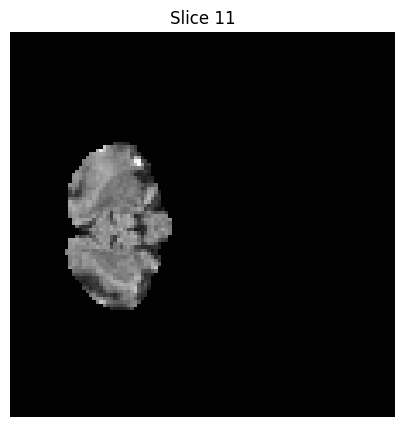

In [ ]:
# visualize the dwi image for a given slice index
volume = images[0]
slice_idx = 11 
plt.figure(figsize=(5, 5))
plt.imshow(volume[:, :, slice_idx], cmap="gray", origin="lower")
plt.title(f"Slice {slice_idx}")
plt.axis("off")
plt.show()

## Read BRATS

In [37]:
train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"],ensure_channel_first=True, allow_missing_keys=True,),
        ToTensord(["image", "label"])
    ]
)

In [38]:
data_dir = "../data/brats/"
json_file = "dataset.json"

datasets = data_dir + json_file
datalist = load_decathlon_datalist(datasets, True, "training")

train_ds = CacheDataset(
    data=datalist,
    transform = train_transforms,
    cache_num=24,
    cache_rate=1.0,
    num_workers=8,
)

train_loader = DataLoader(train_ds, batch_size=1, shuffle=True, pin_memory=True)
check_data = first(train_loader)
images, label = (check_data["image"][0], check_data["label"][0][0])
print(images.shape)
print(label.shape)

Loading dataset: 100%|██████████| 24/24 [00:38<00:00,  1.61s/it]
c:\Users\zouhr\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


torch.Size([4, 240, 240, 155])
torch.Size([240, 240, 155])
